In [5]:
import csv
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd


data = pd.read_csv('merge.csv')
data = data.drop_duplicates(subset=['Ticker', 'Year'])
data

,Unnamed: 0,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4889,4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4890,4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4891,4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD


In [6]:
data['Weighted Yearly Change'] = data['Yearly Return (%)']*data['Weight']


total_change = data.groupby('Ticker')['Yearly Return (%)'].sum()
change_data = pd.DataFrame()

change_data['Ticker'] = total_change.index
change_data['Yearly Return (%)'] = total_change.values
change_data

,Ticker,Yearly Return (%)
0,A,188.782231
1,AAL,89.133264
2,AAP,129.982310
3,AAPL,261.366567
4,ABBV,186.778894
...,...,...
496,YUM,110.037738
497,ZBH,86.978536
498,ZBRA,277.441220
499,ZION,120.084396


In [7]:
first_row = data.groupby('Ticker').nth(0)
first_data = pd.DataFrame()
first_data[['Weight', 'Sector']] = first_row[['Weight', 'Sector']]
first_data.reset_index()
first_data['Ticker'] = first_row.index
first_data = first_data.reset_index(drop=True)


In [8]:
all_data = first_data.merge(change_data, on='Ticker')
all_data

,Weight,Sector,Ticker,Yearly Return (%)
0,0.118341,Health Care,A,188.782231
1,0.025061,Industrials,AAL,89.133264
2,0.022092,Consumer Discretionary,AAP,129.982310
3,7.110275,Information Technology,AAPL,261.366567
4,0.839079,Health Care,ABBV,186.778894
...,...,...,...,...
496,0.112934,Consumer Discretionary,YUM,110.037738
497,0.083689,Health Care,ZBH,86.978536
498,0.042926,Information Technology,ZBRA,277.441220
499,0.012260,Financials,ZION,120.084396


In [9]:
avg_change = all_data.groupby('Sector')['Yearly Return (%)'].mean()
avg_change

Sector
Communication Services    144.094889
Consumer Discretionary    164.391532
Consumer Staples          106.102554
Energy                    108.855446
Financials                140.143458
Health Care               186.191594
Industrials               156.012124
Information Technology    248.724231
Materials                 108.769311
Real Estate                73.185951
Utilities                  85.481979
Name: Yearly Return (%), dtype: float64

In [10]:
ten_year_data = pd.DataFrame()

ten_year_data['Sector'] = avg_change.index
ten_year_data['10 Year Change'] = avg_change.values
ten_year_data['Yearly Change'] = avg_change.values/10
ten_year_data

,Sector,10 Year Change,Yearly Change
0,Communication Services,144.094889,14.409489
1,Consumer Discretionary,164.391532,16.439153
2,Consumer Staples,106.102554,10.610255
3,Energy,108.855446,10.885545
4,Financials,140.143458,14.014346
5,Health Care,186.191594,18.619159
6,Industrials,156.012124,15.601212
7,Information Technology,248.724231,24.872423
8,Materials,108.769311,10.876931
9,Real Estate,73.185951,7.318595


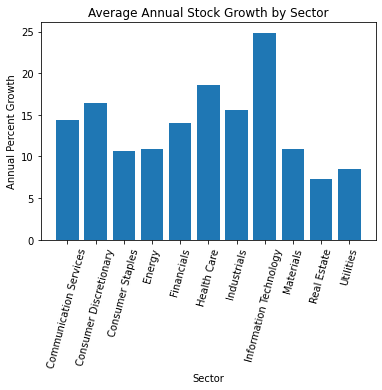

In [11]:
ticks = ten_year_data['Sector']
plt.bar(ten_year_data['Sector'], ten_year_data['Yearly Change'])
plt.xticks(ten_year_data['Sector'], ticks, rotation=75)
plt.xlabel('Sector')
plt.ylabel('Annual Percent Growth')
plt.title('Average Annual Stock Growth by Sector')
plt.show()

In [21]:
all_data = all_data.sort_values('Yearly Return (%)', ascending=False)
top_growth_df = all_data.head(100)
top_growth_df

,Weight,Sector,Ticker,Yearly Return (%)
158,0.088276,Information Technology,ENPH,1351.878333
447,1.264166,Consumer Discretionary,TSLA,1177.080121
339,1.923625,Information Technology,NVDA,673.616067
29,0.408285,Information Technology,AMD,656.368142
407,0.051466,Information Technology,SEDG,573.104170
...,...,...,...,...
133,0.482102,Health Care,DHR,219.707071
206,1.603189,Communication Services,GOOG,219.289568
237,0.104021,Health Care,ILMN,218.775145
406,0.234295,Financials,SCHW,218.427869


In [32]:
grouped_growth = top_growth_df.groupby('Sector')['Ticker'].count()
grouped_growth

new_df = pd.DataFrame()

new_df['Sector'] = grouped_growth.index
new_df['Count'] = grouped_growth.values
new_df

,Sector,Count
0,Communication Services,10
1,Consumer Discretionary,11
2,Consumer Staples,2
3,Energy,1
4,Financials,8
5,Health Care,23
6,Industrials,10
7,Information Technology,34
8,Materials,1


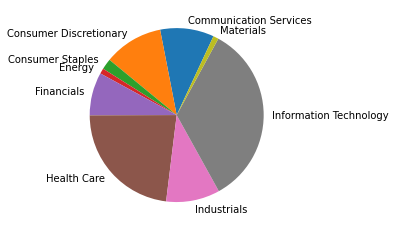

In [42]:
## This was not included in our presentation

plt.pie(x=new_df['Count'], labels = new_df['Sector'], startangle=65)
plt.title('Top 100 Stocks by Sector')
plt.show()

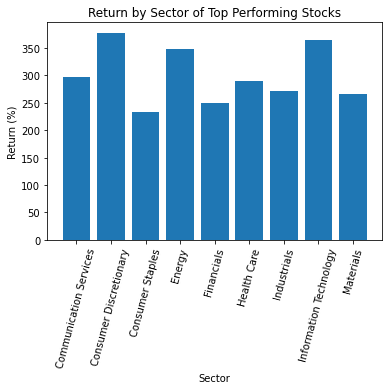

In [60]:
sect_growth = top_growth_df.groupby('Sector')['Yearly Return (%)'].mean()

sect_df = pd.DataFrame()
sect_df['Sector'] = sect_growth.index
sect_df['Return'] = sect_growth.values

ticks = sect_df['Sector']
plt.bar(sect_df['Sector'], sect_df['Return'])
plt.xticks(sect_df['Sector'], ticks, rotation=75)
plt.ylabel('Return (%)')
plt.xlabel('Sector')
plt.title("Return by Sector of Top Performing Stocks")

plt.show()

In [62]:
data.loc[data['Ticker'] == 'ENPH']

,Unnamed: 0,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Change
2390,2390,ENPH,2013,10.000000,3.500000,3.870000,6.340000,63.824298,185.714286,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,5.634154
2391,2391,ENPH,2014,17.969999,6.260000,6.360000,14.290000,124.685529,187.060681,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,11.006740
2392,2392,ENPH,2015,15.250000,1.630000,14.300000,3.510000,-75.454546,835.582825,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,-6.660825
2393,2393,ENPH,2016,3.730000,0.950000,3.430000,1.010000,-70.553937,292.631586,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,-6.228219
2394,2394,ENPH,2017,3.450000,0.650000,1.020000,2.410000,136.274523,430.769258,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,12.029770
2395,2395,ENPH,2018,7.600000,1.830000,2.390000,4.730000,97.907942,315.300531,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,8.642921
2396,2396,ENPH,2019,35.419998,4.610000,4.630000,26.129999,464.362819,668.329656,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,40.992092
2397,2397,ENPH,2020,189.410004,21.490000,26.370001,175.470001,565.415228,781.386718,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,49.912595
2398,2398,ENPH,2021,282.459991,108.879997,178.699997,182.940002,2.372695,159.423217,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,0.209452
2399,2399,ENPH,2022,339.920013,113.400002,185.229996,264.959991,43.043782,199.753094,Enphase Energy Inc.,29355A10,B65SQW4,0.088276,Information Technology,1497646.0,USD,3.799733


6746.25322997416